In [ ]:
#Vanessa Wang HOMEWORK 4

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
"""
Author      : Zeyuan Chen, adapted from Yi-Chieh Wu, Sriram Sankararman
Description : Twitter
"""

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import metrics 
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
import pandas as pd
### ========== TODO : START ========== ###
# append you own path to the tweeter_df.txt file after "/content/drive/My Drive/"
# i.e. "/content/drive/My Drive/CM146HW4/tweets_df.txt"
tweets_df = pd.read_csv("/content/drive/My Drive/tweets_df.txt", index_col = 0)
### ========== TODO : END ========== ###

X = tweets_df.values[:,:-2]
y = tweets_df.values[:, -2]
movies = tweets_df.values[:, -1]

train_idx = np.where((movies == 1) | (movies == 3))[0]
dev_idx   = np.where(movies == 2)[0]
test_idx  = np.where(movies == 0)[0]

X_train, X_dev, X_test = X[train_idx,], X[dev_idx,], X[test_idx,]
y_train, y_dev, y_test = y[train_idx,], y[dev_idx,], y[test_idx,]

For C Values:[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
Training Scores:[0.0, 0.7277936962750715, 0.9386503067484663, 1.0, 1.0, 1.0]
Development Scores:[0.0, 0.0, 0.45370370370370366, 0.6745098039215687, 0.6692913385826772, 0.6692913385826772]


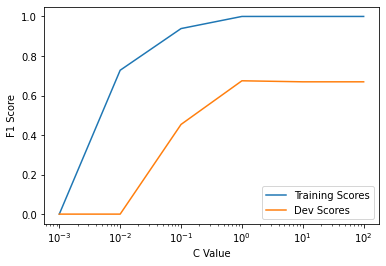

In [ ]:
### ========== TODO : START ========== ###
# part 4.1a: show the train and development set f1-score when C is set to 10^-3 10^-2 10^-1 1, 10, 100, 1000
#            This can typically be done in 20 lines or so
train_scores= []
dev_scores= []
c_vals = 10.0 ** np.arange(-3,3)

for c in c_vals:
  model = SVC(C=c, kernel="linear")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  train_scores.append(metrics.f1_score(y_train, y_pred))
  y_pred = model.predict(X_dev)
  dev_scores.append(metrics.f1_score(y_dev, y_pred))

print("For C Values:{}".format(c_vals))
print("Training Scores:{}".format(train_scores))
print("Development Scores:{}".format(dev_scores))

plt.figure()
plt.plot(c_vals, train_scores, label="Training Scores")
plt.plot(c_vals, dev_scores, label="Dev Scores")
plt.xlabel("C Value")
plt.ylabel("F1 Score")
plt.xscale("log")
plt.legend()
plt.show()

### ========== TODO : END ========== ###

In [ ]:
### ========== TODO : START ========== ###
# part 4.1b: select the best model based on development set f1-score 
#            retrain the model on train and dev set
#            test the final model on the test set
#            This can typically be done in 5 lines or so
model = SVC(C=1.0, kernel = "linear")
model.fit(np.concatenate((X_train, X_dev)), np.concatenate((y_train, y_dev)))
y_pred = model.predict(X_test)
print("Retraining the model on the train + dev set, the F1-score for best C=1.0 is: {}".format(metrics.f1_score(y_test,y_pred)))
### ========== TODO : END ========== ###

Retraining the model on the train + dev set, the F1-score for best C=1.0 is: 0.8735632183908046


In [ ]:
def plot_scatter(embedding_2d, labels, show = True, save_as = None, title = None):
    """
    Visualize 2D data

    Parameters
    --------------------
        embedding_2d   -- numpy array of shape (n,2) samples
        labels         -- numpy array of shape (n,) labels
        show           -- optional boolean indicator on if display the visualziation, default set to True 
        save_as        -- optional string indicating where we should save the figure, default set to None
        title          -- optional string indicating what should be the title, default set to None
    --------------------
        None    
    """
    
    plt.scatter(embedding_2d[:,0], embedding_2d[:,1], c = labels) 
    if title is not None:
        plt.title(title)
    if save_as is not None:
        plt.savefig(save_as)
    if show:
        plt.show() 

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_embedding = pca.transform(X)

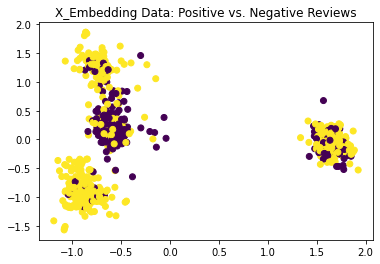

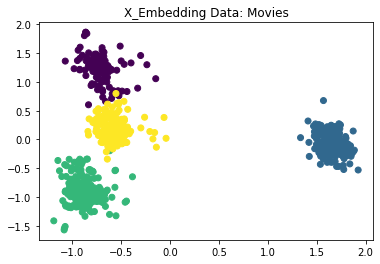

In [ ]:
### ========== TODO : START ========== ###
# part 4.2a: visualize the embedding. First color the dots by positive or negative review, then by movies 
#            This can typically be done in 2 lines or so
plot_scatter(X_embedding, y, title="X_Embedding Data: Positive vs. Negative Reviews")
plot_scatter(X_embedding, movies, title = "X_Embedding Data: Movies")
### ========== TODO : END ========== ###

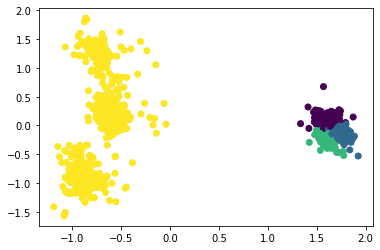

K Means Model adjusted rand score: 0.25935622456493296


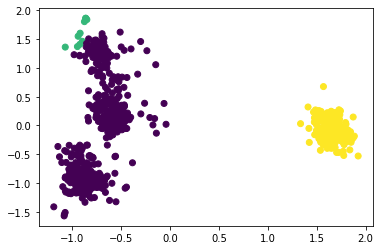

Gaussian Model  adjusted rand score:0.4189198834394529


In [ ]:
### ========== TODO : START ========== ###
# part 4.2b: First color the dots by Kmeans with 4 components, random initialization, 1 iteration, random_state = 2
#            then by GMM with 4 components, random starting point, 1 iteration and random_state = 0
#            report the adjusted rand score for both
#            This can typically be done in 10 lines or so
model=KMeans(n_clusters=4, init="random", n_init=1, random_state=2)
model.fit(X_embedding)
y_pred=model.predict(X_embedding)
k_means_score=adjusted_rand_score(movies, y_pred)
plot_scatter(X_embedding, y_pred)
print ("K Means Model adjusted rand score: {}".format(k_means_score))

model=GaussianMixture(n_components=4, random_state=0, init_params="random")
model.fit(X_embedding)
y_pred=model.predict(X_embedding)
gmm_score= adjusted_rand_score(movies, y_pred)
plot_scatter(X_embedding, y_pred)
print ("Gaussian Model adjusted rand score:{}".format(gmm_score))

### ========== TODO : END ========== ###

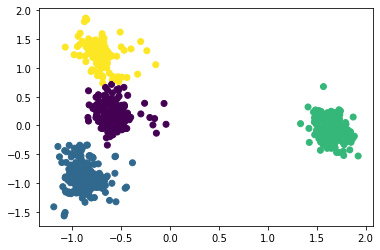

K Means Model adjusted rand score: 0.9824442429232366


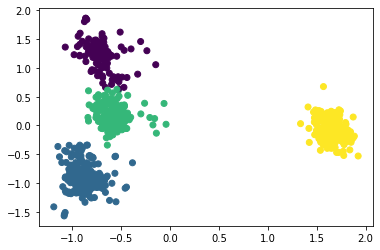

Gaussian Model adjusted rand score:0.982486480501798


In [ ]:
### ========== TODO : START ========== ###
# part 4.2c: First color the dots by Kmeans with 4 components, random initialization, 100 iterations, random_state = 2
#            then by GMM with 4 components, random starting point, 100 iterations and random_state = 0
#            report then adjusted rand score for both
#            This can typically be done in 10 lines or so

model=KMeans(n_clusters=4, init="random", n_init=100, random_state=2)
model.fit(X_embedding)
y_pred=model.predict(X_embedding)
k_means_score=adjusted_rand_score(movies, y_pred)
plot_scatter(X_embedding, y_pred)
print ("K Means Model adjusted rand score: {}".format(k_means_score))

model=GaussianMixture(n_components=4, random_state=0, init_params="random", n_init=100)
model.fit(X_embedding)
y_pred=model.predict(X_embedding)
gmm_score= adjusted_rand_score(movies, y_pred)
plot_scatter(X_embedding, y_pred)
print ("Gaussian Model adjusted rand score:{}".format(gmm_score))
### ========== TODO : END ========== ###